# Para saber mais: resumindo as medidas de tendência central


As medidas de tendência central são ferramentas estatísticas que ajudam a descrever as características dos dados resumindo-os em um único valor. Essas medidas incluem a `média`, a `mediana` e a `moda`. Cada uma possui características únicas e é útil em diferentes situações.

### Média (μ)
A `média`, também conhecida como `média aritmética`, é a medida de tendência central mais conhecida. Ela é a soma de todos os valores divididos pelo número de observações e representa o ponto de equilíbrio dos dados. A fórmula matemática para a média é:

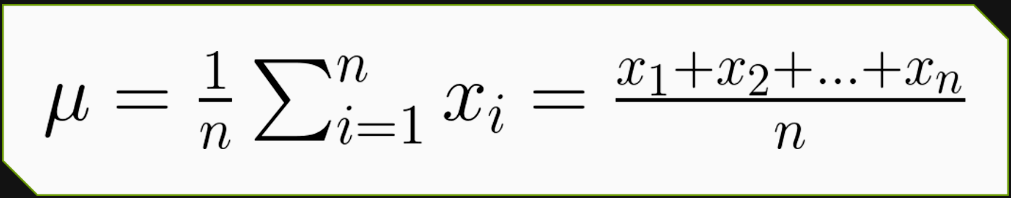

No python, a média pode ser calculada usando a função mean(). Por exemplo, para calcular a média da coluna de salários em um **data.frame** dados, você usaria:

> 
> dados.salarios.mean()
> 

### Mediana (Md)
A `mediana` representa o valor central de um conjunto de dados, passando o número que divide um conjunto de dados exatamente ao meio. Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:

1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados (n);
3. Identificar o elemento mediano:

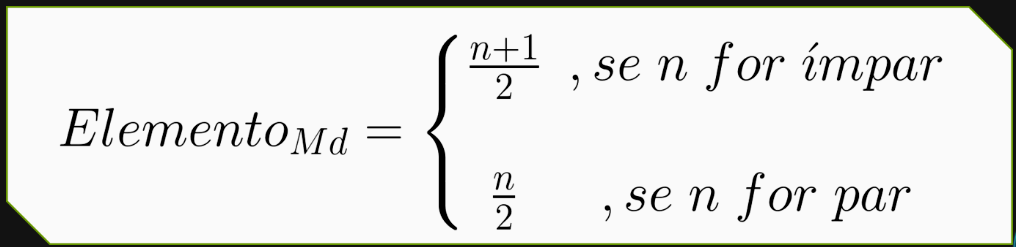

Obter a mediana:

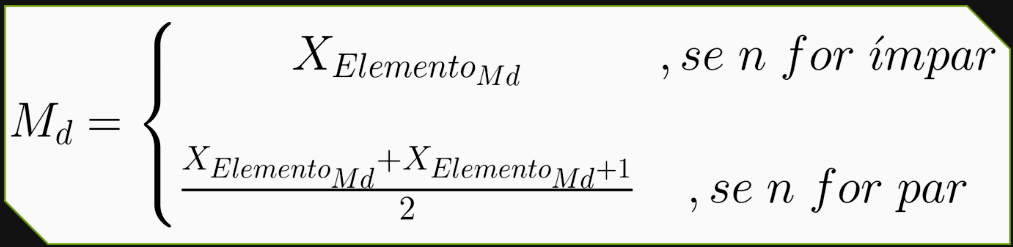

No python, a mediana é calculada com a função ***median***(). Por exemplo:

```python
dados.salarios.median()
```

A mediana é extremamente útil em distribuições que são assimétricas, onde a média pode ser influenciada por valores extremos `(outliers)`.

#### Diferença entre Média e Mediana
Um tema bem importante é a análise da diferença entre a média e a mediana. Dizemos anteriormente que a média é sensível a valores extremos ou outliers.

Por exemplo, em uma empresa, se a maioria dos funcionários ganha entre R$ 2.000 e R$ 5.000, mas o CEO ganha R$ 50.000, a média salarial será puxada para cima, não refletindo a realidade da maioria dos funcionários. A mediana, neste caso, seria uma medida mais adequada, pois não seria tão influenciada pelo salário do CEO.

Ou seja, a análise pela mediana é mais vantajosa que a média quando você está lidando com dados mais assimétricos ou quando há outliers significativos.

Vamos considerar um conjunto de dados hipotético sobre os salários em uma pequena empresa para ilustrar a diferença entre média e mediana em uma visualização:

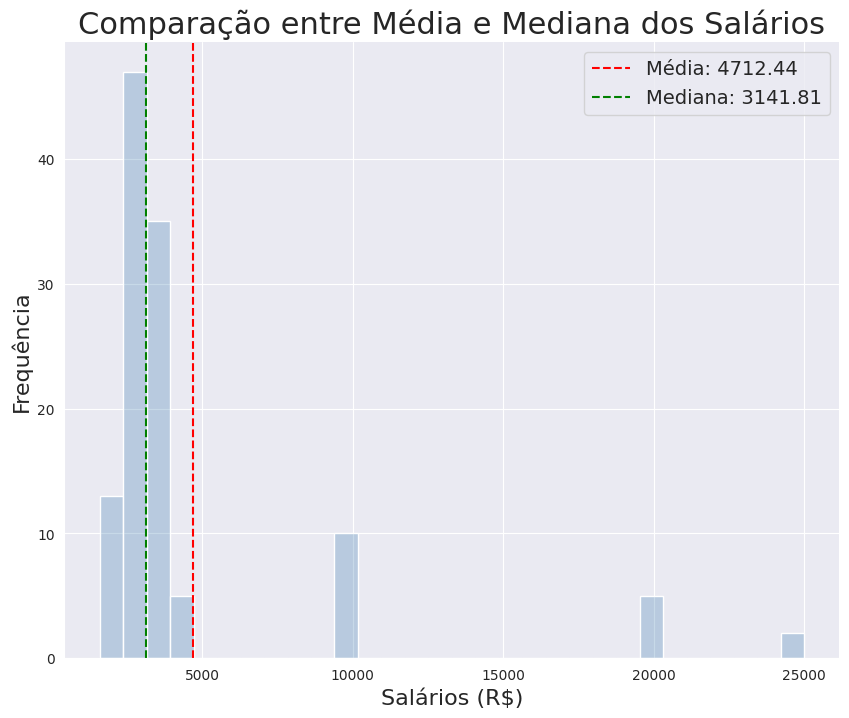

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo a semente para garantir resultados reproduzíveis
np.random.seed(123)

# Simulando dados de salários
salarios = np.concatenate([np.random.normal(3000, 500, 100), [10000] * 10, [20000] * 5, [25000] * 2])

# Criando o DataFrame
dados = pd.DataFrame(salarios, columns=['salarios'])

# Calculando a média e a mediana
media_salarios = dados['salarios'].mean()
mediana_salarios = dados['salarios'].median()

# Ajustando o tamanho do gráfico
plt.figure(figsize=(10, 8))

sns.set_style('darkgrid')
# Criando o histograma e a linha de densidade
sns.histplot(dados['salarios'], bins=30, color='steelblue', alpha=0.3)

# Adicionando as linhas para média e mediana
plt.axvline(media_salarios, color="red", linestyle="--", label=f'Média: {media_salarios:.2f}')
plt.axvline(mediana_salarios, color="green", linestyle="--", label=f'Mediana: {mediana_salarios:.2f}')

# Adicionando título e rótulos aos eixos
plt.title("Comparação entre Média e Mediana dos Salários", fontsize=22, ha='center')
plt.xlabel("Salários (R$)", fontsize=16)
plt.ylabel("Frequência", fontsize=16)

sns.despine()

# Adicionando a legenda
plt.legend(title='', fontsize=14)

plt.show()

Note que no gráfico a média claramente é mais afetada pelos candidatos à outlier em comparação com a mediana, ilustrando o comportamento de sensibilidade da média à valores extremos que apontamos anteriormente.

### Moda
A moda é o valor ou valores mais frequentes em um conjunto de dados. É importante para identificar qual categoria ou valor é o mais comum. Dados podem ser unimodais (uma moda), bimodais (duas modas) ou multimodais (várias modas).

No python, a moda é calculada com a função mode(). Por exemplo:

```python
dados.salarios.mode()
```

Neste caso, é possível trazer 1 ou mais variáveis para o caso de unimodal, bimodal ou multimodal

## Para saber mais: resumindo as relações entre média, mediana e moda


A média, a mediana e a moda são medidas de tendência central que fornecem diferentes perspectivas sobre os dados. Na estatística, a relação entre elas pode revelar importantes características sobre a distribuição dos dados, como sua simetria ou assimetria. Essas informações são importantes para entender a natureza dos dados e determinar a necessidade de transformações ou alertar para a provável presença de outliers. Vamos explorar como investigar essas relações e entender seus impactos.

Logo abaixo, podemos observar 3 tipos de comportamentos da distribuição de dados e como as estatísticas se posicionam em cada uma delas:

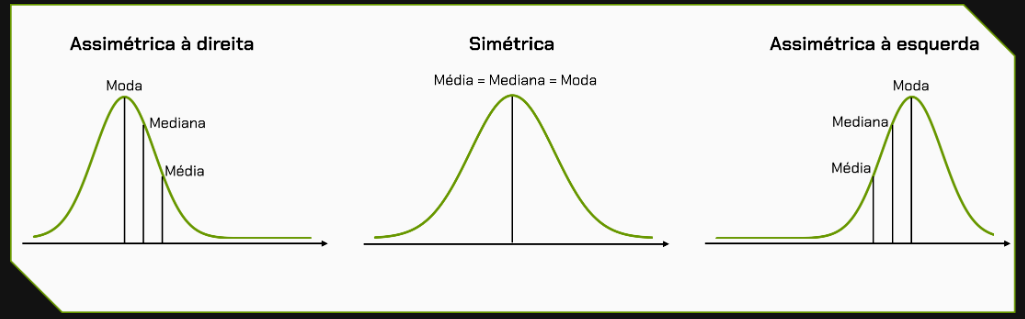

#### 1. Assimetria à Direita (Média > Mediana > Moda): 
Também conhecida como assimetria positiva, ocorre quando a cauda da distribuição é mais longa à direita do gráfico. Isso geralmente indica uma concentração de dados abaixo da média, com alguns valores extremos altos que puxam a média para cima, acima da mediana e da moda.

Exemplo: Renda anual em uma população, onde poucos ganham muito mais que a maioria.

#### 2. Simetria (Média = Mediana = Moda): 
Em uma distribuição perfeitamente simétrica, média, mediana e moda estão no mesmo ponto. Isso indica uma distribuição balanceada onde valores se distribuem igualmente em torno de um ponto central.

#### 3.Assimetria à Esquerda (Moda > Mediana > Média): 
Aqui, a cauda é mais longa à esquerda. A presença de valores extremamente baixos puxa a média para baixo, enquanto a maior concentração de dados ocorre acima da média.

Exemplo: Consumo de energia em residências durante o verão.

#### Vamos aplicar isso a um exemplo?
Durante o verão, o consumo de energia aumenta devido ao uso de ar condicionado. No entanto, algumas residências, especialmente as desocupadas ou com sistemas de energia eficientes, apresentam consumos muito baixos, o que pode resultar em uma distribuição assimétrica à esquerda.

Vamos simular esses dados para consumo mensal a fim de compreender a distribuição. A função rvs() gera 10.000 amostras de uma distribuição Beta com parâmetros a = 10 e b = 4.

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import beta

# Definir a semente para garantir resultados reproduzíveis
np.random.seed(42)

# Gerando os dados de consumo de energia (distribuição Beta com parâmetros a=10, b=4)
consumo_energia = 2 * np.round(100 * beta.rvs(10, 4, size=10000), 0)

# Criando o DataFrame
df_consumo = pd.DataFrame(consumo_energia, columns=['Consumo'])

# Exibindo as primeiras linhas
df_consumo.head()

,Consumo
0,154.0
1,146.0
2,148.0
3,126.0
4,182.0


Agora, vamos calcular as medidas de tendência central para ter uma noção da distribuição dos dados:

In [5]:
# Exibindo as medidas
medidas = {
    'media': df_consumo['Consumo'].mean(),
    'mediana': df_consumo['Consumo'].median(),
    'moda': df_consumo['Consumo'].mode()[0]
}
medidas

media = df_consumo['Consumo'].mean()
mediana = df_consumo['Consumo'].median()
moda = df_consumo['Consumo'].mode()[0]

Se compararmos os valores obtidos com uma das curvas da imagem no início do texto, notamos uma provável assimetria à esquerda, onde há a moda > mediana > média. Vamos criar um histograma para ilustrar essa distribuição assimétrica e destacar as posições da média, mediana e moda.

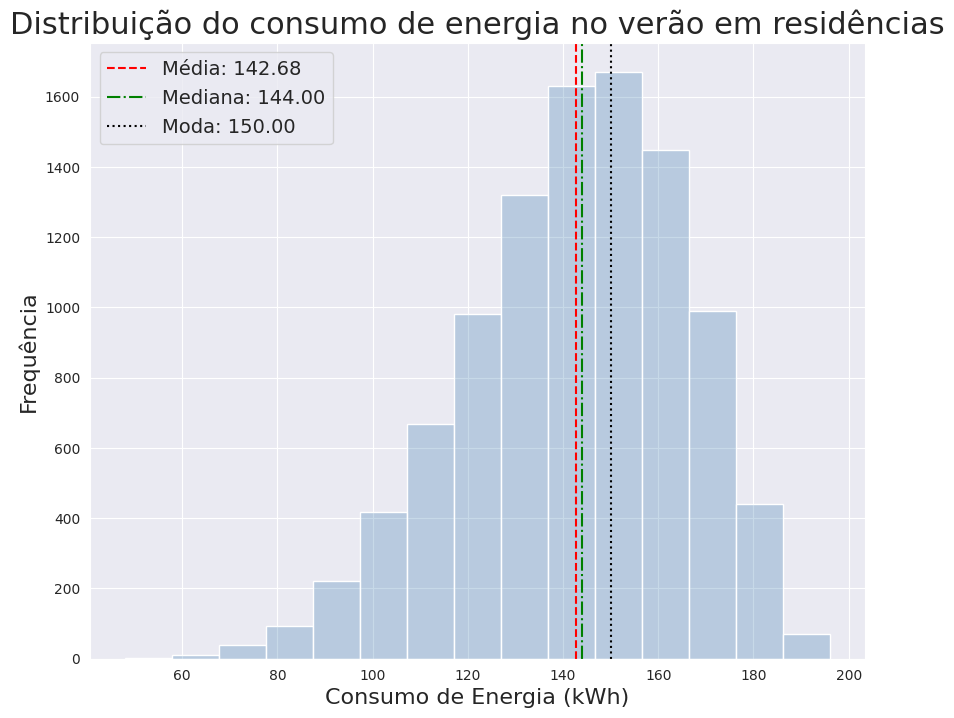

In [6]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(10, 8))

sns.set_style('darkgrid')

# Criando o histograma
sns.histplot(df_consumo['Consumo'], bins=15, color='steelblue', alpha=0.3)

# Adicionando as linhas para média, mediana e moda
plt.axvline(media, color="red", linestyle="--", label=f'Média: {media:.2f}')
plt.axvline(mediana, color="green", linestyle="-.", label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color="black", linestyle=":", label=f'Moda: {moda:.2f}')

# Títulos e rótulos
plt.title('Distribuição do consumo de energia no verão em residências', fontsize=22, ha='center')
plt.xlabel('Consumo de Energia (kWh)', fontsize=16)
plt.ylabel('Frequência', fontsize=16)

# Adicionando a legenda
plt.legend(title='', fontsize=14)

# Exibindo o gráfico
plt.show()

Alguns comportamentos interessantes que podemos observar aqui:

* `Média`: tem menor valor porque é influenciada pelos valores mais baixos.
* `Mediana`: representa o ponto central, menos afetado pelos extremos que a média.
* `Moda`: reflete o valor mais comum, concentrado em um ponto alto na distribuição.
* `Simetria` da Distribuição: a relação moda > mediana > médiademonstra que a distribuição é assimétrica à esquerda. Assim, identificar assimetria ajuda a decidir se transformações (como log ou raiz quadrada) são necessárias para análises estatísticas e os candidatos a outliers podem ser explorados para entender padrões incomuns no consumo.